In [1]:
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt 
import os

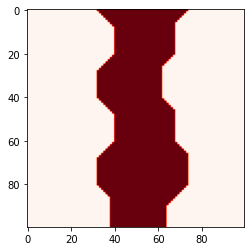

In [ ]:
# version1, generate 2D matrix 1s
imageWidth = 100
imageLength = 100
nodes = 6
numofimg = 8
margainHole = 20
lengthforHole = 10
image = np.zeros((numofimg, imageLength, imageWidth))
# print(image)
for i in range(numofimg):
  startidx = random.sample(list(range(10, imageWidth//2 - 10)), 1)
  endidx = random.sample(list(range(imageWidth//2 + 10, imageWidth - 10)), 1)
  displacement = [-10, -8, -6, 6, 8, 10]
  holeonBorder =  random.choice([4])    # 1: no hole, 2, top hole, 3, bottom hole, 4 top and bottom hole
  for n in range(nodes - 1):
    startidx += [startidx[-1] + random.choice(displacement)]

    start1 = startidx[n]
    start2 = startidx[n + 1]
    if start1 < start2:
      increse = 1
    else:
      increse = -1

    for j in range(n*imageLength//(nodes -1), (n + 1) *imageLength//(nodes - 1)):
      if start1 < 0: start1 = 0
      if start1 > imageWidth//2: start1 = imageWidth//2
      image[i, j, start1:imageWidth//2 + 1] = 1
      if start1 == start2:continue
      else: start1 += increse
    endidx += [endidx[-1] + random.choice(displacement)]
    end1 = endidx[n]
    end2 = endidx[n + 1]
    if end1 < end2:
      increse = 1
    else:
      increse = -1
    for j in range(n*imageLength//(nodes -1), (n + 1) *imageLength//(nodes - 1)):   
      if end1 < imageWidth//2: end1 = imageWidth//2
      if end1>imageWidth: end1 = imageWidth
      image[i, j, imageWidth//2:end1] = 1
      if end1 == end2: continue
      else: end1 += increse
    # set top or bottom holes
    if holeonBorder == 2 and endidx[0] - startidx[0] >= lengthforHole + 2* margainHole:
      image[i, 0, startidx[0] + margainHole:endidx[0] - margainHole] = 0
    elif holeonBorder == 3 and endidx[-1] - startidx[-1] >= lengthforHole + 2* margainHole:
      image[i, -1, startidx[-1] + margainHole:endidx[-1] - margainHole] = 0
    elif holeonBorder == 4:
      if endidx[0] - startidx[0] >= lengthforHole + 2* margainHole:
        image[i, 0, startidx[0] + margainHole:endidx[0] - margainHole] = 0
      if endidx[-1] - startidx[-1] >= lengthforHole + 2* margainHole:
        image[i, -1, startidx[-1] + margainHole:endidx[-1] - margainHole] = 0



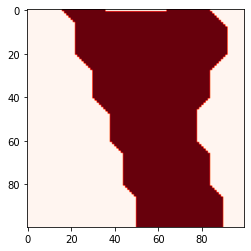

In [ ]:
i = 2   # decdie which picture to plot
tmpimage = np.zeros((imageLength, imageWidth))
tmpimage[:,:] = image[i,:,:]
np.savetxt("foo.csv", tmpimage, delimiter=",")
plt.figure()    
plt.imshow(tmpimage, cmap='Reds', vmin=0, vmax=1)

In [ ]:
# get the coordinates of 1s
# idx = 1
# tmpimage = np.zeros((imageLength, imageWidth))
# tmpimage[:,:] = image[idx,:,:]
# res = []
# for i in range(imageLength):
#   for j in range(imageWidth):
#     if tmpimage[i][j] == 1:
#       res.append([i, j])
# print(res)
# for i in range(100):
#   print(res[i][0]*0.3, '     ', res[i][1]*0.03)

In [35]:
# version2  generate vertex
# geometry variation: (15 * 50)^12 = 3*10^34. 
imageWidth = 100
imageLength = 100
nodes = 6
numofimg = 100
margainHole = 20
lengthforHole = 10
numVertex = 8
# print(image)
images = [[] for _ in range(numofimg)]
for i in range(numofimg):
    vertexes = []
  # startidx = random.sample(list(range(10, imageWidth//2 - 10)))
  # endidx = random.sample(list(range(imageWidth//2 + 10, imageWidth - 10)))
    for v in range(numVertex):
        x = random.randint(1, imageWidth//2 - 10)
        if v == 0:
            vertexes.append([x, 0])
        elif v == numVertex - 1:
            vertexes.append([x, imageLength])
        else:
            yrangestart = 5 + ((imageLength - 10)//(numVertex - 2))*(v - 1) 
            yrangesend = 5 + ((imageLength - 10)//(numVertex - 2))*(v)      
            y = random.randint(yrangestart, yrangesend)
            vertexes.append([x, y])


    for v in range(numVertex)[::-1]:
        x = random.randint(imageWidth//2 + 10, imageWidth - 1)
        if v == 0:
            vertexes.append([x, 0])
          # add a hole
            if x - vertexes[0][0] >= 40:  
                vertexes.append([x - 15, 0])
                vertexes.append([x - 15, 3])
                vertexes.append([vertexes[0][0] + 15,3])
                vertexes.append([vertexes[0][0] + 15, 0])
        elif v == numVertex - 1:
          # add a hole
            if x - vertexes[-1][0] >= 40:       
                vertexes.append([vertexes[-1][0] + 15, imageLength])
                vertexes.append([vertexes[-1][0] + 15, imageLength - 3])
                vertexes.append([x - 15, imageLength - 3])
                vertexes.append([x - 15, imageLength])
            vertexes.append([x, imageLength])
        else:
            yrangestart = 5 + ((imageLength - 10)//(numVertex - 2))*(v - 1) 
            yrangesend = 5 + ((imageLength - 10)//(numVertex - 2))*(v)  
            y = random.randint(yrangestart, yrangesend)
            vertexes.append([x, y])
    for v in range(len(vertexes)):
        vertexes[v][0] *= 0.3
        vertexes[v][1] *= 0.03
    vertexes = np.around(vertexes, decimals = 2) 
    images[i] = vertexes
    

print('finish')
  


finish


In [38]:

print(images[1])

[[ 9.6   0.  ]
 [ 4.2   0.57]
 [ 0.3   0.69]
 [10.2   1.05]
 [ 2.4   1.59]
 [ 4.2   2.19]
 [ 3.6   2.43]
 [ 2.7   3.  ]
 [ 7.2   3.  ]
 [11.7   2.91]
 [17.1   2.91]
 [17.1   3.  ]
 [21.6   3.  ]
 [28.8   2.79]
 [26.7   2.13]
 [27.9   1.8 ]
 [29.7   1.32]
 [21.3   0.78]
 [21.9   0.15]
 [27.3   0.  ]
 [22.8   0.  ]
 [22.8   0.09]
 [14.1   0.09]
 [14.1   0.  ]]


In [39]:
# save to txt files

os.getcwd()
os.chdir('C:\\Users\\zhuof\\Desktop\\ML for 2D materials\\PMLgithub\\data\\Generate_Random_Geometres\\')
os.getcwd()
for i in range(numofimg): 
    if len(str(i)) == 1:
        idx = '00' + str(i)
    elif len(str(i)) == 2:
        idx = '0' + str(i)
    else:
        idx = str(i)
    f= open('file' + idx +".txt","w+") 
    array = images[i]
    for j in range(len(array)):
        f.write(str(array[j][0]) +  '      ' + str(array[j][1]) + '\n')
    f.close() 
    
  

['9.6', '0.0']
['5.1', '0.6']
['3.0', '0.81']
['0.3', '1.05']
['8.1', '1.5']
['3.0', '2.01']
['0.6', '2.55']
['7.5', '3.0']
['12.0', '3.0']
['16.5', '2.91']
['22.8', '2.91']
['22.8', '3.0']
['27.3', '3.0']
['20.4', '2.64']
['26.4', '2.16']
['27.3', '1.83']
['29.4', '1.08']
['26.1', '0.96']
['21.0', '0.48']
['24.9', '0.0']
['20.4', '0.0']
['20.4', '0.09']
['14.1', '0.09']
['14.1', '0.0']


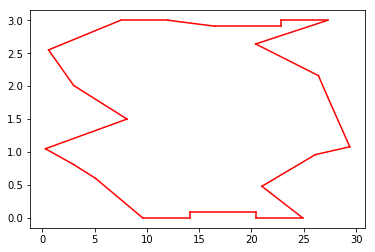

In [4]:
# import txt files
os.getcwd()
os.chdir('C:\\Users\\zhuof\\Desktop\\ML for 2D materials\\PMLgithub\\data\\Generate_Random_Geometres\\')
os.getcwd()
f= open("file000.txt","r") 
array = []
for row in f:
    data = row.split()
    print(data)
    point = [float(data[0]), float(data[1])]
    array.append(point)
f.close()
vertexdata = array
start = vertexdata[-1]
end = vertexdata[0]
for node1, node2 in zip(vertexdata, vertexdata[1:]):
    x0, y0 = node1
    x1, y1 = node2
    x_values = [x0, x1]
    y_values = [y0, y1]
    plt.plot(x_values, y_values, 'r')
# collection the last line
plt.plot([start[0], end[0]],[start[1], end[1]], 'r')
plt.show()
        

[[ 16   0]
 [  9   9]
 [ 29  20]
 [ 37  37]
 [ 37  51]
 [ 37  75]
 [ 34  88]
 [ 14 100]
 [ 29 100]
 [ 44  97]
 [ 62  97]
 [ 62 100]
 [ 77 100]
 [ 87  88]
 [ 67  67]
 [ 70  65]
 [ 68  44]
 [ 71  20]
 [ 86   5]
 [ 82   0]
 [ 67   0]
 [ 67   3]
 [ 31   3]
 [ 31   0]]
100 100
(101, 101)


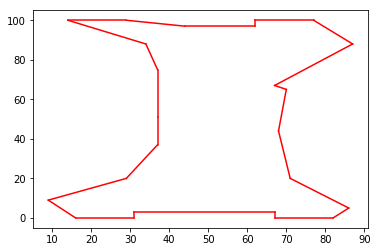

3


In [35]:
# plot simulated data  

import matplotlib.pyplot as plt        
vertexdata = np. array(images[2])

vertexdata = array
mat = [[0 for _  in range(imageWidth + 1)] for _ in range(imageLength + 1)]
mat = np.array(mat)
print(mat.shape)
start = vertexdata[-1]
end = vertexdata[0]
for node1, node2 in zip(vertexdata, vertexdata[1:]):
    x0, y0 = node1
    x1, y1 = node2
    x_values = [x0, x1]
    y_values = [y0, y1]
    plt.plot(x_values, y_values, 'r')
# collection the last line
plt.plot([start[0], end[0]],[start[1], end[1]], 'r')
plt.show()
# draw_line



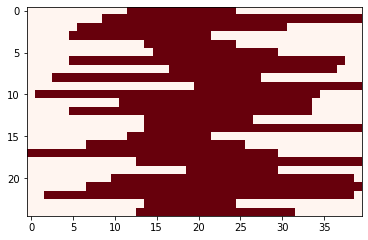

In [ ]:
# draw a line between 2 coordinates in a 2D matrix

def draw_line(mat, x0, y0, x1, y1, inplace=False):
    if not (0 <= x0 < mat.shape[0] and 0 <= x1 < mat.shape[0] and
            0 <= y0 < mat.shape[1] and 0 <= y1 < mat.shape[1]):
        raise ValueError('Invalid coordinates.')
    if not inplace:
        mat = mat.copy()
    if (x0, y0) == (x1, y1):
        mat[x0, y0] = 1
        return mat if not inplace else None
    # Swap axes if Y slope is smaller than X slope
    transpose = abs(x1 - x0) < abs(y1 - y0)
    if transpose:
        mat = mat.T
        x0, y0, x1, y1 = y0, x0, y1, x1
    # Swap line direction to go left-to-right if necessary
    if x0 > x1:
        x0, y0, x1, y1 = x1, y1, x0, y0
    # Write line ends
    mat[x0, y0] = 1
    mat[x1, y1] = 1
    # Compute intermediate coordinates using line equation
    x = np.arange(x0 + 1, x1)
    y = np.round(((y1 - y0) / (x1 - x0)) * (x - x0) + y0).astype(x.dtype)
    # Write intermediate coordinates
    mat[x, y] = 1
    if not inplace:
        return mat if not transpose else mat.T

def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional



AttributeError: ignored

<Figure size 432x288 with 0 Axes>

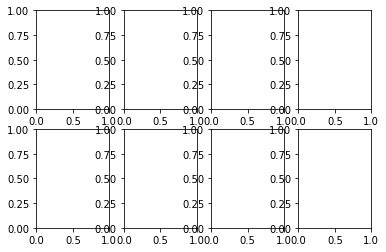

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,4) 

for m in range(8):
  axarr[m].imshow(image[m,:,:], cmap='Reds', vmin=0, vmax=1)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically

axarr[0].imshow(v_slice[0])
axarr[1].imshow(v_slice[1])
axarr[2].imshow(v_slice[2])
axarr[3].imshow(v_slice[3])